In [61]:
import pandas as pd
df = pd.read_csv('master_dataset_clean.csv').drop(["County", "State", "Unnamed: 0","FIPS"], axis=1)

In [62]:
df.dtypes

live 2a1w1c                            float64
min 1a1c                               float64
pct_less_hs                            float64
pct_hs                                 float64
pct_some_college                       float64
pct_college                            float64
crime_per_10k_x                        float64
unemployment_rate_2019                 float64
median_household_income_2019             int64
Food                                     int64
Medical                                  int64
Housing                                  int64
Transportation                           int64
Civic                                    int64
Other                                    int64
Required annual income after taxes       int64
Annual taxes                             int64
Required annual income before taxes      int64
crime_per_10k_y                        float64
violent_crime_per_10k                  float64
hard_drugs_crime_per_10k               float64
soft_drugs_cr

In [63]:
df.describe()

,live 2a1w1c,min 1a1c,pct_less_hs,pct_hs,pct_some_college,pct_college,crime_per_10k_x,unemployment_rate_2019,median_household_income_2019,Food,...,Civic,Other,Required annual income after taxes,Annual taxes,Required annual income before taxes,crime_per_10k_y,violent_crime_per_10k,hard_drugs_crime_per_10k,soft_drugs_crime_per_10k,commerce_crimes_per_10k
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,...,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000
mean,27.035905,8.448635,13.061038,34.174015,30.826370,21.940308,213.517325,3.927587,55656.284524,7565.166293,...,3635.282602,5123.703941,45504.658122,10753.275873,56257.874079,213.517326,40.741543,8.742535,31.582034,27.082270
std,2.146110,1.639746,6.258067,7.215851,5.200671,9.534227,195.699096,1.424564,14439.081331,517.016910,...,153.979634,117.596974,3086.739206,2364.840405,4488.883826,195.699039,39.094692,14.142338,45.326798,25.419047
min,23.450000,7.250000,1.100000,7.300000,5.200000,0.000000,0.000000,0.800000,24732.000000,7238.000000,...,3341.000000,4996.000000,42127.000000,6904.000000,49489.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.800000,7.250000,8.500000,29.700000,27.300000,15.300000,84.610000,3.000000,46214.000000,7238.000000,...,3554.000000,5070.000000,43721.000000,9373.000000,53705.000000,84.605589,16.489165,0.565004,8.348988,7.850526
50%,26.590000,7.250000,11.700000,34.600000,30.800000,19.600000,177.400000,3.700000,53289.000000,7394.000000,...,3554.000000,5144.000000,44684.000000,10784.000000,55312.000000,177.402323,35.130573,4.196127,23.396531,21.669116
75%,27.560000,9.450000,16.700000,39.100000,34.200000,26.000000,290.450000,4.600000,61878.000000,7394.000000,...,3838.000000,5144.000000,46197.000000,12202.000000,57390.000000,290.448056,56.176651,11.053761,42.785566,40.073899
max,49.450000,13.500000,73.600000,57.400000,60.600000,77.600000,2741.560000,20.900000,151806.000000,8639.000000,...,3838.000000,5514.000000,76454.000000,26406.000000,102860.000000,2741.562644,793.092910,212.765957,1210.780370,309.644670


In [64]:
from scipy import stats
import numpy as np
#drop all upper bound outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#drop all lower bound outliers
df = df[(np.abs(stats.zscore(df)) > -3).all(axis=1)]
#drop zero row values
df = df.loc[(df!=0).any(axis=1)]
print(len(df))
df.describe()

2521


,live 2a1w1c,min 1a1c,pct_less_hs,pct_hs,pct_some_college,pct_college,crime_per_10k_x,unemployment_rate_2019,median_household_income_2019,Food,...,Civic,Other,Required annual income after taxes,Annual taxes,Required annual income before taxes,crime_per_10k_y,violent_crime_per_10k,hard_drugs_crime_per_10k,soft_drugs_crime_per_10k,commerce_crimes_per_10k
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,...,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,26.701376,8.199976,13.018247,34.962793,31.360928,20.659104,192.026743,3.839746,53915.084887,7463.328441,...,3667.780246,5097.151924,44939.614835,10604.896470,55544.431575,192.026818,35.840652,6.670541,27.873544,24.111956
std,1.323503,1.313342,5.606045,6.501269,4.823432,7.754161,156.926734,1.174521,11552.462166,432.637516,...,139.195298,50.456986,1957.014138,1921.424454,2741.339645,156.926645,28.023552,8.919255,26.437072,22.125754
min,23.450000,7.250000,1.100000,15.200000,15.800000,7.200000,0.000000,1.400000,24732.000000,7238.000000,...,3554.000000,4996.000000,42127.000000,6972.000000,49979.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.790000,7.250000,8.700000,30.700000,28.000000,15.100000,68.100000,3.000000,45939.000000,7238.000000,...,3554.000000,5070.000000,43661.000000,9517.000000,53676.000000,68.096204,14.088716,0.000000,7.280140,5.952008
50%,26.550000,7.250000,12.000000,35.200000,31.300000,19.000000,164.900000,3.600000,52554.000000,7394.000000,...,3554.000000,5070.000000,44395.000000,10766.000000,55219.000000,164.901664,31.864987,3.261997,21.629755,18.477458
75%,27.390000,9.250000,16.700000,39.500000,34.600000,24.200000,282.400000,4.500000,60384.000000,7394.000000,...,3838.000000,5144.000000,45672.000000,11805.000000,56978.000000,282.396190,52.732233,9.033424,41.008856,37.201281
max,32.730000,12.000000,31.800000,54.500000,46.300000,50.400000,787.370000,8.200000,98217.000000,8639.000000,...,3838.000000,5144.000000,53719.000000,17831.000000,68082.000000,787.373150,152.596116,51.091500,161.049063,102.758791


In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def test_model(model):
    reg = model.fit(X_train_scale, y_train)
    print(f'    Model: {type(reg).__name__}')
    print(f'    Train score: {reg.score(X_train_scale, y_train)}')
    print(f'    Test Score: {reg.score(X_test_scale, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test_scale))
    plt.show()
y_vals = ['crime_per_10k_y','violent_crime_per_10k', 'hard_drugs_crime_per_10k','soft_drugs_crime_per_10k', 'commerce_crimes_per_10k']

REGRESSIONS FOR crime_per_10k_y
    Model: LinearRegression
    Train score: 0.07087434436404705
    Test Score: 0.07965350885080447




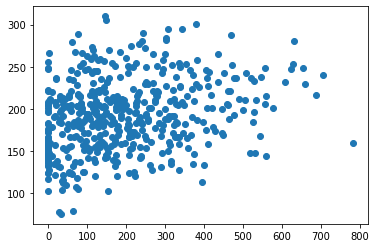

    Model: KNeighborsRegressor
    Train score: 0.479460731557651
    Test Score: 0.21669030383161736




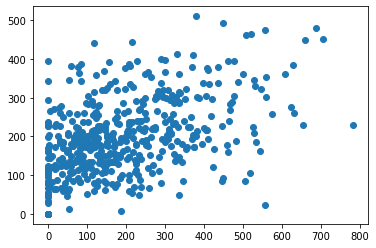

    Model: RandomForestRegressor
    Train score: 0.9041910659757166
    Test Score: 0.3615602619409628




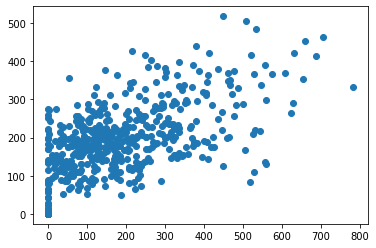

    Model: ExtraTreesRegressor
    Train score: 1.0
    Test Score: 0.3544829763700761




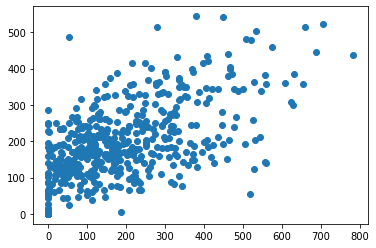

    Model: AdaBoostRegressor
    Train score: 0.1573903735257528
    Test Score: 0.05520861394295684




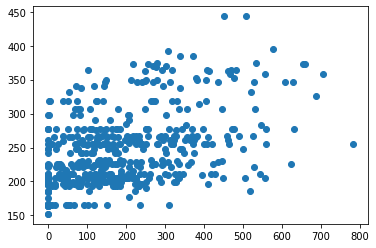

REGRESSIONS FOR violent_crime_per_10k
    Model: LinearRegression
    Train score: 0.061402883212392734
    Test Score: 0.050547243084851035




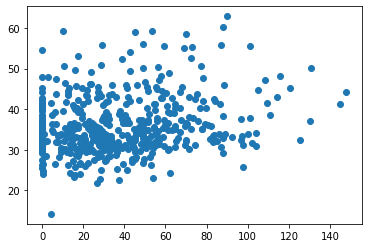

    Model: KNeighborsRegressor
    Train score: 0.4994428414314004
    Test Score: 0.20384117364223198




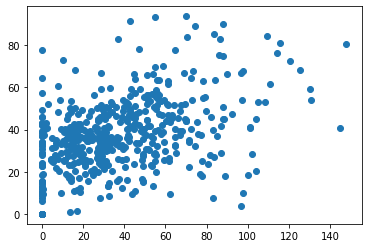

    Model: RandomForestRegressor
    Train score: 0.9033671499669584
    Test Score: 0.3157227592558054




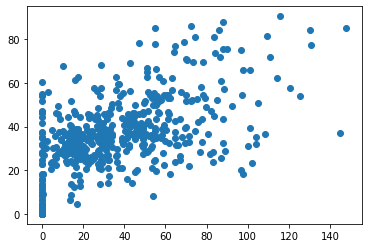

    Model: ExtraTreesRegressor
    Train score: 1.0
    Test Score: 0.30217993432404366




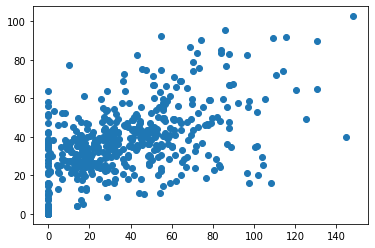

    Model: AdaBoostRegressor
    Train score: 0.11904114996531545
    Test Score: 0.056824664407467695




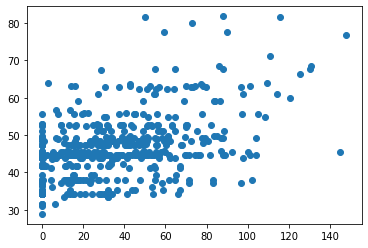

REGRESSIONS FOR hard_drugs_crime_per_10k
    Model: LinearRegression
    Train score: 0.08728527610781822
    Test Score: 0.12508309030784825




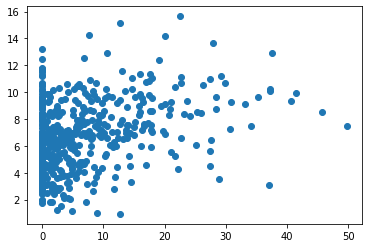

    Model: KNeighborsRegressor
    Train score: 0.3938242541734144
    Test Score: 0.22338336515064394




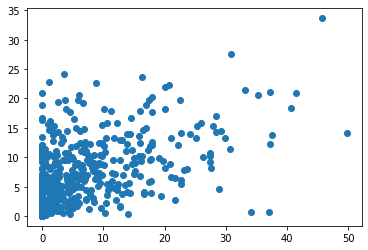

    Model: RandomForestRegressor
    Train score: 0.8834285007510264
    Test Score: 0.28860465044656125




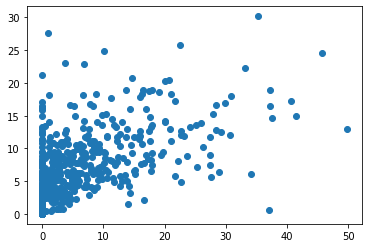

    Model: ExtraTreesRegressor
    Train score: 1.0
    Test Score: 0.3062250721786869




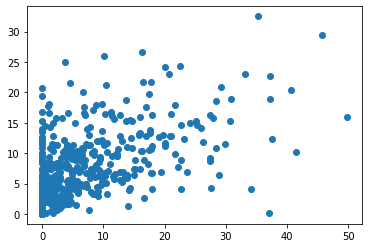

    Model: AdaBoostRegressor
    Train score: 0.1042931817085132
    Test Score: 0.030579437163281487




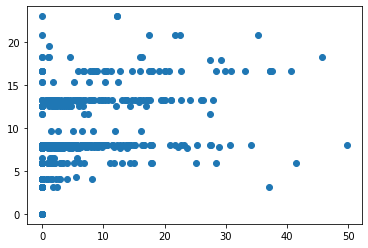

REGRESSIONS FOR soft_drugs_crime_per_10k
    Model: LinearRegression
    Train score: 0.06005011993381615
    Test Score: 0.06571482503477288




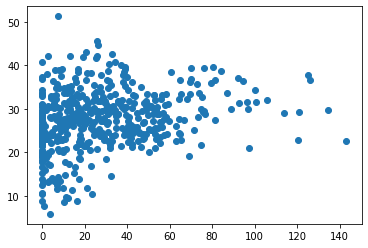

    Model: KNeighborsRegressor
    Train score: 0.42582499599806634
    Test Score: 0.13315590513140008




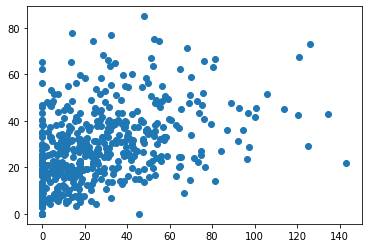

    Model: RandomForestRegressor
    Train score: 0.8868592616211227
    Test Score: 0.21450101420593082




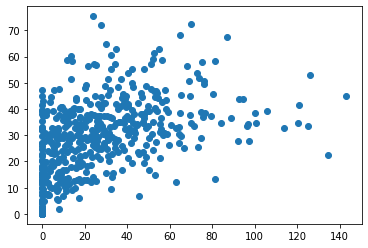

    Model: ExtraTreesRegressor
    Train score: 1.0
    Test Score: 0.2548350453189474




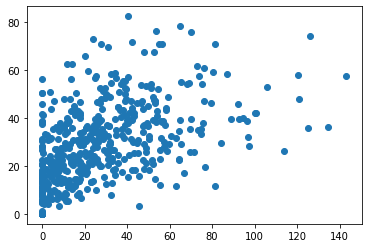

    Model: AdaBoostRegressor
    Train score: -0.15746755412115654
    Test Score: -0.2243847772333798




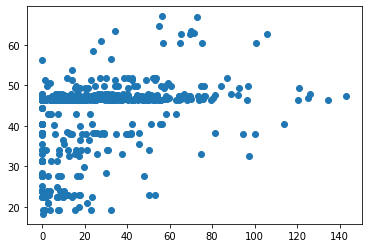

REGRESSIONS FOR commerce_crimes_per_10k
    Model: LinearRegression
    Train score: 0.085874112479429
    Test Score: 0.05763380519193251




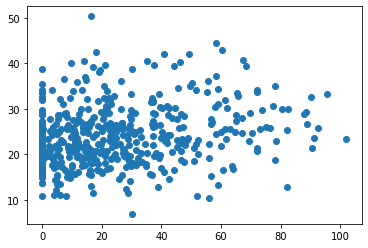

    Model: KNeighborsRegressor
    Train score: 0.4711810836506485
    Test Score: 0.20441752004815383




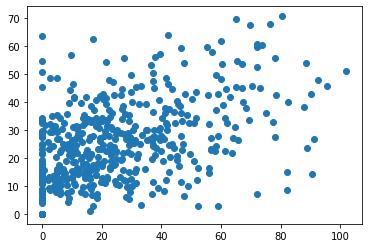

    Model: RandomForestRegressor
    Train score: 0.8978889440574258
    Test Score: 0.297975282282671




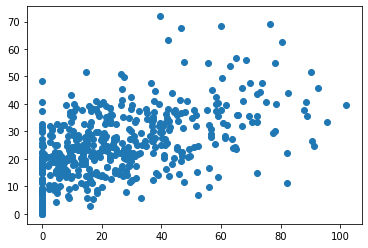

    Model: ExtraTreesRegressor
    Train score: 1.0
    Test Score: 0.3274888946729413




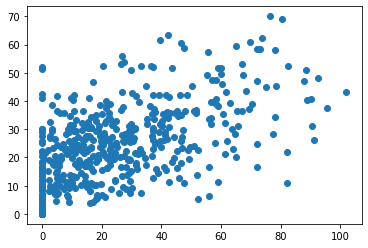

    Model: AdaBoostRegressor
    Train score: 0.11575861881603677
    Test Score: 0.08318064181425111




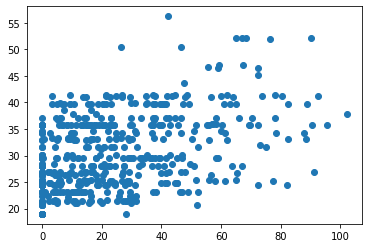

In [94]:
for y in y_vals:
    X = df.drop(['crime_per_10k_x','crime_per_10k_y','violent_crime_per_10k', 'hard_drugs_crime_per_10k','soft_drugs_crime_per_10k', 'commerce_crimes_per_10k'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    print(f'REGRESSIONS FOR {y}')
    test_model(LinearRegression())
    test_model(KNeighborsRegressor())
    test_model(RandomForestRegressor())
    test_model(ExtraTreesRegressor())
    test_model(AdaBoostRegressor())